# Price Weighted Index

In [80]:
import pandas as pd 
import numpy as np 
import yfinance 
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
yfinance.pdr_override()
plt.style.use('fivethirtyeight')

## Creating indexes from 6 indonesian healthcare service sectors 

In [81]:
tickers = ['SILO.jk', 'MIKA.jk', 'SRAJ.jk', 'PRDA.jk', 'SAME.jk', 'SRAJ.jk']
health_service = pd.DataFrame()

In [82]:
for ticker in tickers :
    health_service[ticker] = wb.get_data_yahoo(ticker, start = '2015-01-01', end = '2023-04-01')[['Close']]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [83]:
health_service.dropna(inplace = True)

In [84]:
health_service

,SILO.jk,MIKA.jk,SRAJ.jk,PRDA.jk,SAME.jk
Date,,,,,
2016-12-09,1273.405762,2540.0,256.0,6500.0,578.0
2016-12-13,1273.405762,2520.0,256.0,6100.0,550.0
2016-12-14,1285.829346,2520.0,252.0,5825.0,554.0
2016-12-15,1267.194092,2500.0,258.0,5475.0,540.0
2016-12-16,1245.453003,2510.0,262.0,5250.0,528.0
...,...,...,...,...,...
2023-03-27,1395.000000,3000.0,640.0,5800.0,254.0
2023-03-28,1390.000000,2940.0,620.0,5575.0,284.0
2023-03-29,1380.000000,2910.0,635.0,5525.0,284.0


In [85]:
health_service.drop('2022-06-14', axis = 0, inplace = True) #this data is not correct to the original value

### Calulating Price Weighted Index With Non Normalize Data 

In [86]:
health_service.sum(axis = 1)

Date
2016-12-09    11147.405762
2016-12-13    10699.405762
2016-12-14    10436.829346
2016-12-15    10040.194092
2016-12-16     9795.453003
                  ...     
2023-03-27    11089.000000
2023-03-28    10809.000000
2023-03-29    10734.000000
2023-03-30    11015.000000
2023-03-31    11268.000000
Length: 1581, dtype: float64

## Normalizing Data to the value of 100 to get PWI

In [87]:
normalize_data = health_service / health_service.iloc[0] * 100
normalize_data.head()

,SILO.jk,MIKA.jk,SRAJ.jk,PRDA.jk,SAME.jk
Date,,,,,
2016-12-09,100.000000,100.000000,100.00000,100.000000,100.000000
2016-12-13,100.000000,99.212598,100.00000,93.846154,95.155709
2016-12-14,100.975619,99.212598,98.43750,89.615385,95.847751
2016-12-15,99.512200,98.425197,100.78125,84.230769,93.425606
2016-12-16,97.804882,98.818898,102.34375,80.769231,91.349481


In [88]:
normalize_data['PWI'] = health_service.sum(axis = 1) / health_service.sum(axis = 1)[0] * 100
normalize_data

,SILO.jk,MIKA.jk,SRAJ.jk,PRDA.jk,SAME.jk,PWI
Date,,,,,,
2016-12-09,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2016-12-13,100.000000,99.212598,100.000000,93.846154,95.155709,95.981128
2016-12-14,100.975619,99.212598,98.437500,89.615385,95.847751,93.625634
2016-12-15,99.512200,98.425197,100.781250,84.230769,93.425606,90.067540
2016-12-16,97.804882,98.818898,102.343750,80.769231,91.349481,87.872041
...,...,...,...,...,...,...
2023-03-27,109.548743,118.110236,250.000000,89.230769,43.944637,99.476060
2023-03-28,109.156095,115.748031,242.187500,85.769231,49.134948,96.964264
2023-03-29,108.370799,114.566929,248.046875,85.000000,49.134948,96.291462


## Plotting Data 

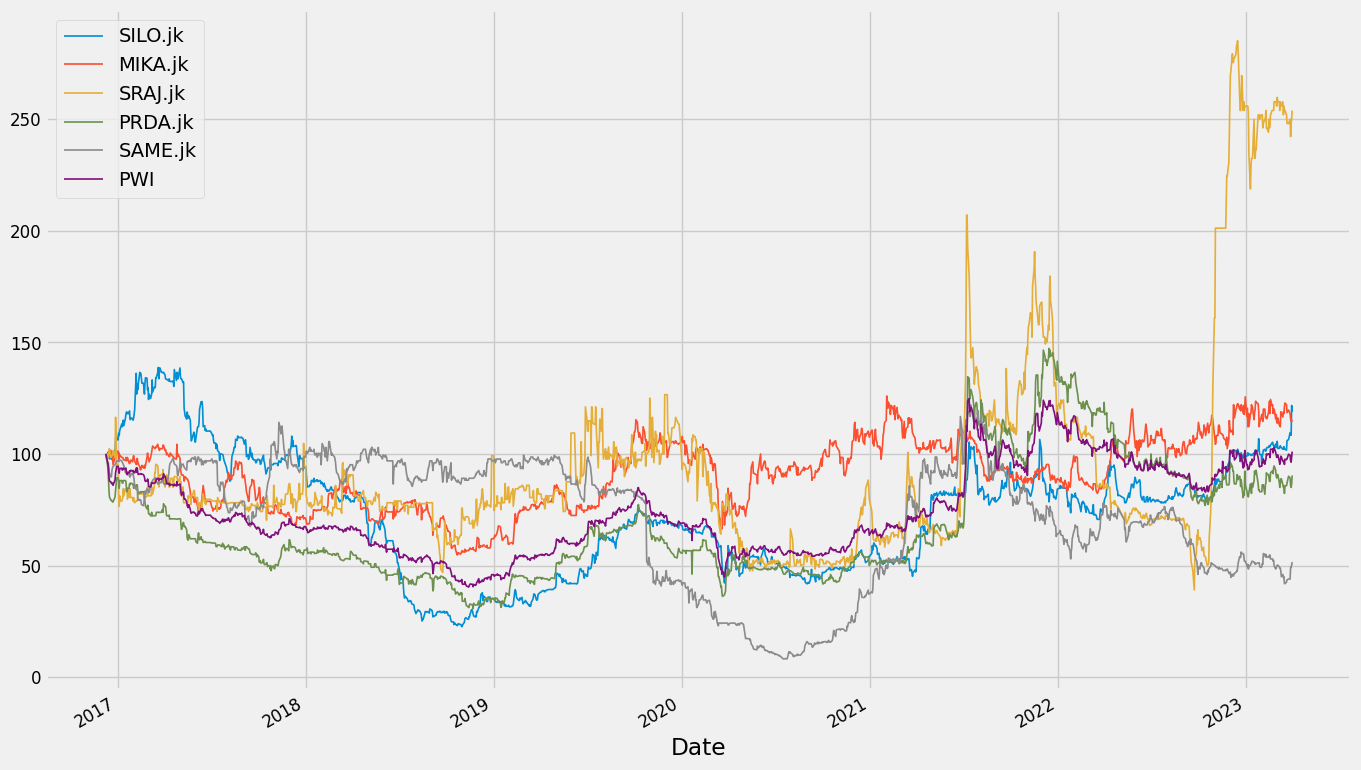

In [89]:
normalize_data.plot(figsize = (15,10), linewidth = 1.2, fontsize = 12 )
plt.legend()
plt.show()

## Showing Cons of PWI is Very Dependable on the Highest Share Price

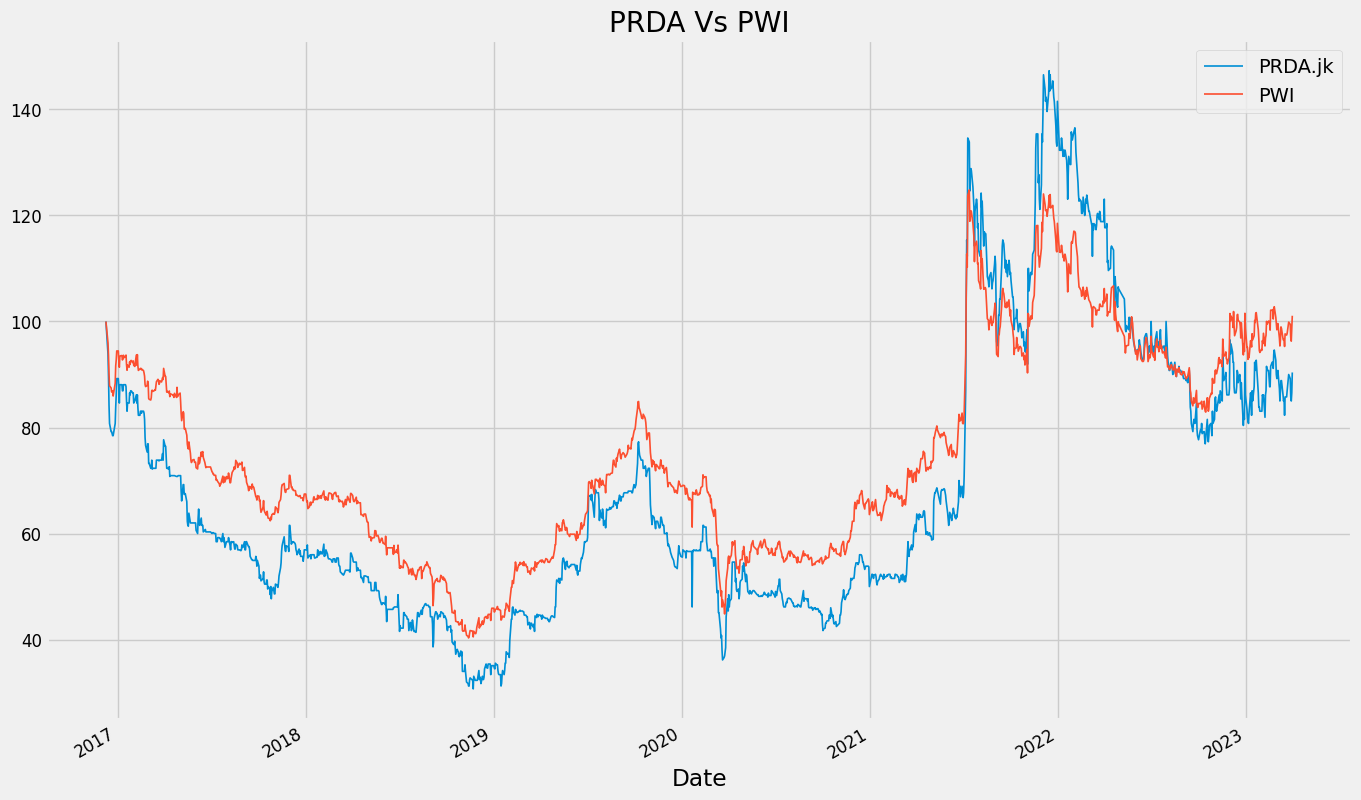

In [98]:
normalize_data.loc[:, ['PRDA.jk','PWI']].plot(figsize = (15,10), linewidth = 1.2, fontsize = 12)
plt.title('PRDA Vs PWI')
plt.show()

From the chart above we see that the PWI movement is similar to the share price of PRDA normalized price, thus showing that PWI method is highly subjective to the stock with the highest price per share 

## Calculating The Weight of Each Stock in PWI 

In [100]:
health_service.div(health_service.sum(axis = 1), axis = 0)

,SILO.jk,MIKA.jk,SRAJ.jk,PRDA.jk,SAME.jk
Date,,,,,
2016-12-09,0.114233,0.227856,0.022965,0.583095,0.051851
2016-12-13,0.119016,0.235527,0.023927,0.570125,0.051405
2016-12-14,0.123201,0.241453,0.024145,0.558120,0.053081
2016-12-15,0.126212,0.248999,0.025697,0.545308,0.053784
2016-12-16,0.127146,0.256241,0.026747,0.535963,0.053903
...,...,...,...,...,...
2023-03-27,0.125800,0.270538,0.057715,0.523041,0.022906
2023-03-28,0.128597,0.271996,0.057360,0.515774,0.026274
2023-03-29,0.128563,0.271101,0.059158,0.514720,0.026458


### Plotting The Weight of Each Stock 

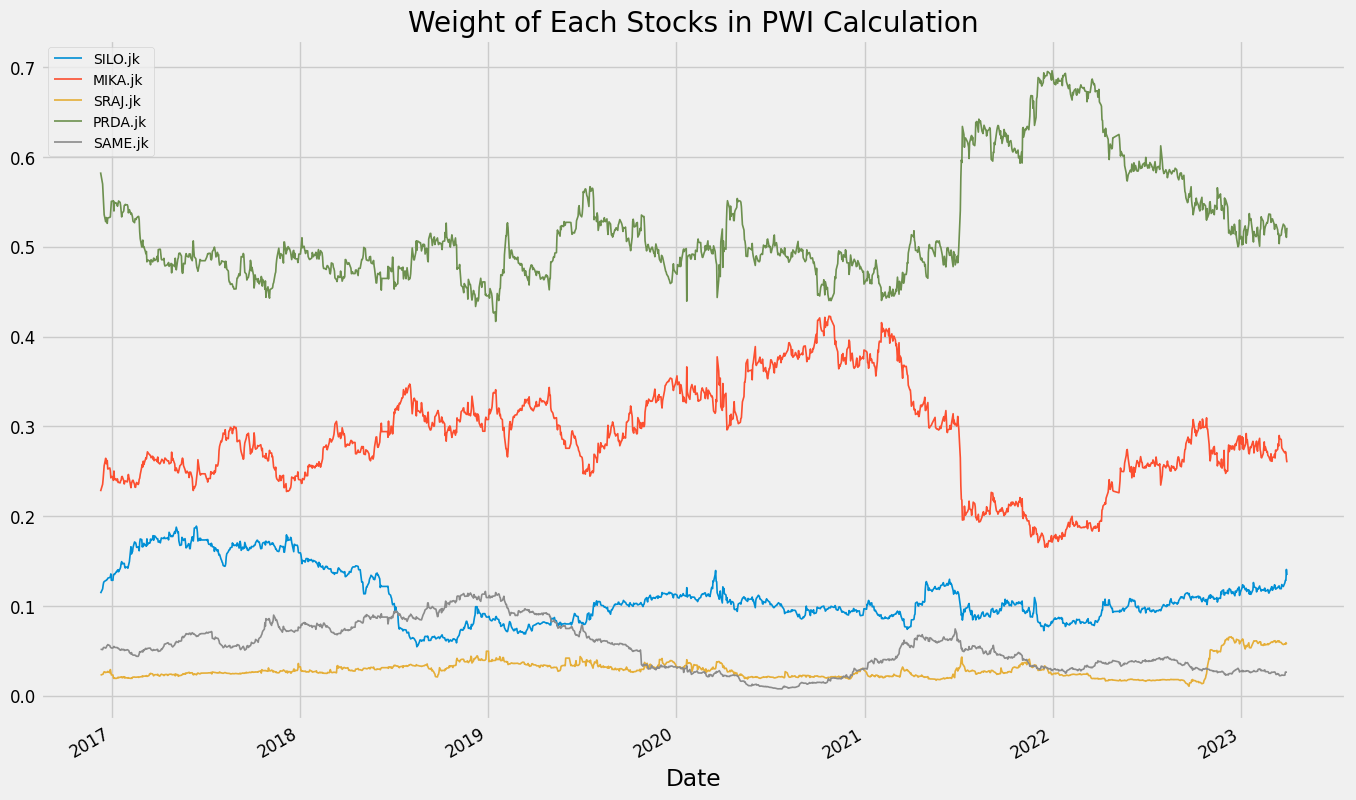

In [103]:
health_service.div(health_service.sum(axis = 1), axis = 0).plot(figsize = (15,10), linewidth = 1.2, fontsize = 12)
plt.title("Weight of Each Stocks in PWI Calculation")
plt.legend(loc = 'upper left', fontsize = 10)
plt.show()